# Redes Neuronales Convolucionales con imagenes de perros y gatos

## Parte 1.- Construir el modelo de CNN

### Importar las librerías y paquetes

In [12]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Conv2D #imagenes en 2D
from keras.layers import Flatten,Dense

### Inicializar la CNN 

In [13]:
classifier = Sequential()

### Paso 1.- Capa de convolución

In [14]:
#kernel es el tamaño de la matriz, filters los fltros que van a ser , n_filters son los detectores de rasgos
#Para nuestro caso tenemos 32 ventanas de caracteristicas en matriz de 3x3
#Ponemos las imagenes en tamaño pequeño para menor costo computacional
#Debemos pensar si es necesario tener nuestros canales de color
#Imagenes de 64x64 y 3 canales de color 
#Usamos el rectificador lineal uniforme
classifier.add( Conv2D( filters=32,kernel_size=(3,3),input_shape = (64, 64, 3),activation= "relu") )#Convolución en 2D

### Paso 2.- Capa de Max pooling

El maximo del valor de cada ventana con respecto a una matriz, haciendo que los mapas de caracteristicas sean mas chicos y además toma en cuenta si la imagen está rotada o no

In [15]:
#una matriz de 2x2
classifier.add(MaxPooling2D(pool_size=(2,2) )) #capa de MAX Pooling


In [16]:
#Segunda capa de convolucion y max pooling, ya no especificamos el tamaño de entrada
classifier.add( Conv2D( filters=32,kernel_size=(3,3),activation= "relu") )
classifier.add(MaxPooling2D(pool_size=(2,2) ))

### Paso 3.- FLattening (aplanado)

Pasar las matrices a un vector de 1 dimension

In [17]:
classifier.add(Flatten()) #Capa de aplanado, tenemos un vector unico

### paso 4.- full connection, capa totalmente conectada

In [18]:
#units de la capa de oculta, 128 nodos en la primer capa oculta, es decir varias neuronitas (circulos)
#una neurona se despierta con la cantidad de señal
classifier.add(Dropout(0.3)
classifier.add(Dense(units =128,activation="relu")) #Capa de aplancapa oculta
#Probabilidad de ser perro o ser gato, por eso solo 1 neuronita
classifier.add(Dense(units =1,activation="sigmoid")) #Capa de salida 2

### Paso 5.- Compilar la red neuronal

In [19]:
#Optimizador de Adam, mejor que gradiente descendiente
#funcion de perdidad (loss), eligimos una binaria, pero si fueran mas, sería categorica
#Usamos accuracy como metrica
classifier.compile(optimizer ="adam",loss="binary_crossentropy",metrics=["accuracy"])

## Parte 2.- Ajustar la red Neuronal Convolucional a las imagenes para entrenar

Podemos hacer transformaciones de imagenes, reescalandolas, volteandolas, haciendo zoom, etc. Todo eso hace que tebngamos mas datos

In [20]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Cargamos las imagenes

In [21]:
#20% mas zoom
train_datagen = ImageDataGenerator(rescale= 1./255,shear_range=0.2,horizontal_flip=True) 
test_datagen = ImageDataGenerator(rescale=1./255)
#batch_size, se cargan de 32 en 32 en la red neuronal
training_dataset = train_datagen.flow_from_directory('dataset/training_set',
                                                        target_size = (64, 64),batch_size =32,class_mode='binary')
testing_dataset = test_datagen.flow_from_directory('dataset/test_set',
                                                        target_size = (64, 64),batch_size =32,class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
classifier.fit_generator(training_dataset, #conjunto de entrenamiento
            steps_per_epoch = training_dataset.n//32, #Muestras que toma en cada ciclo de entrenamiento, pasaremos todas las imagenes
            epochs=25, #Cuantas epocas usaremos para entrenar
            validation_data=testing_dataset, #Conjunto de validación
            validation_steps=2000) #Cada cuantos pasadas validaremos nuestro resultado en este caso 2 cada 8 epocas

<ipython-input-23-39bd43bf8d5b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_dataset, #conjunto de entrenamiento


Epoch 1/25
250/250 [==============================] - 127s 501ms/step - loss: 0.6609 - accuracy: 0.6020 - val_loss: 0.5807 - val_accuracy: 0.7005
Epoch 2/25
250/250 [==============================] - 36s 143ms/step - loss: 0.5782 - accuracy: 0.6961
Epoch 3/25
250/250 [==============================] - 35s 140ms/step - loss: 0.5202 - accuracy: 0.7411
Epoch 4/25
250/250 [==============================] - 34s 137ms/step - loss: 0.4819 - accuracy: 0.7624
Epoch 5/25
250/250 [==============================] - 34s 135ms/step - loss: 0.4569 - accuracy: 0.7832
Epoch 6/25
250/250 [==============================] - 33s 131ms/step - loss: 0.4169 - accuracy: 0.8084
Epoch 7/25
250/250 [==============================] - 33s 130ms/step - loss: 0.3989 - accuracy: 0.8207
Epoch 8/25
250/250 [==============================] - 33s 131ms/step - loss: 0.3592 - accuracy: 0.8426
Epoch 9/25
250/250 [==============================] - 33s 131ms/step - loss: 0.3363 - accuracy: 0.8537
Epoch 10/25
250/250 [=========

In [24]:
classifier.save('perros_gatos.h5')

In [26]:
from keras.models import load_model
new_model = load_model('perros_gatos.h5')

### OBtener resultados

In [28]:
"""test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(
   'dataset/test_set', 
     target_size=(64, 64),
    batch_size=32,
    class_mode='binary')"""
test_steps_per_Epoch = np.math.ceil(testing_dataset.samples / testing_dataset.batch_size) #retorna la lista en enteros

predictions = classifier.predict_generator(testing_dataset, steps=test_steps_per_Epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

<ipython-input-28-1b747758e020>:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = classifier.predict_generator(testing_dataset, steps=test_steps_per_Epoch)


In [31]:
true_classes = testing_dataset.classes
class_labels = list(testing_dataset.class_indices.keys())   

In [32]:
print(class_labels)
print(true_classes)

['cats', 'dogs']
[0 0 0 ... 1 1 1]


In [33]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

        cats       0.50      1.00      0.67      1000
        dogs       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Parte 3.- Hacer predicciones

In [51]:
import numpy as np
#Para cargar solo una imagen
from keras.preprocessing import image


In [123]:
#cargamos la imagen, y se convierte a 64x64
test_image = image.load_img('dataset/single_prediction/iris.jpeg',target_size = (64, 64))
#modificamos la imagen en 2 dimensiones que pase, lo pasamos a array, debemos indiciar también la dimension de cuantas imagenes
#hay
test_image = image.img_to_array(test_image)
#expandimos la dimension, y se convierte en 4 dimensiones, la ultima dimension solo nos dice el tamaño de imagenes
test_image = np.expand_dims(test_image,axis=0)

In [124]:
xd = classifier.predict(test_image)

In [125]:
xd 

array([[1.]], dtype=float32)

Nos da 1 como resultado, y 1 debemos saber que es

In [126]:
training_dataset.class_indices

{'cats': 0, 'dogs': 1}

0 pertenece a gato, uno a perro

In [127]:
if(xd[0][0]==1):
    print("La imagen es un perro")
if(xd[0][0]==0):
    print("La imagen es un gato")

La imagen es un perro


In [128]:
import matplotlib.pyplot as plt
test_image.shape #1 imagen de 64x64 de 3 colores

(1, 64, 64, 3)

In [129]:
print(test_image[0][0][0])

[138. 140. 135.]


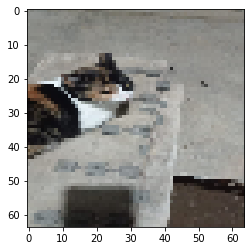

In [130]:
plt.imshow( test_image[0].astype('uint8'))